In [5]:
import pandas as pd

# Load the results from each anomaly detection method
vessel_data = pd.read_csv('Generated_csv\\vessel_data_with_features.csv')

# Load the individual anomaly results from different methods
vessel_data_zscore = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_zscore.csv')
vessel_data_moving_avg = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_moving_avg.csv')
vessel_data_kalman = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_kalman.csv')
vessel_data_dbscan = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_dbscan.csv')
vessel_data_isolation_forest = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_isolation_forest.csv')
vessel_data_autoencoder = pd.read_csv('Generated_csv\\vessel_data_with_anomalies_autoencoder.csv')

# Merge results into a single DataFrame
vessel_data['zscore_anomaly'] = vessel_data_zscore['sog_anomaly'] | vessel_data_zscore['cog_anomaly']
vessel_data['moving_avg_anomaly'] = vessel_data_moving_avg['sog_anomaly_moving_avg'] | vessel_data_moving_avg['cog_anomaly_moving_avg']
vessel_data['kalman_anomaly'] = vessel_data_kalman['sog_anomaly_kalman']
vessel_data['dbscan_anomaly'] = vessel_data_dbscan['anomaly_dbscan']
vessel_data['isolation_forest_anomaly'] = vessel_data_isolation_forest['anomaly_isolation_forest']
vessel_data['autoencoder_anomaly'] = vessel_data_autoencoder['anomaly_autoencoder']

# Combine using a simple voting system (flagged as an anomaly if flagged by at least 3 methods)
vessel_data['combined_anomaly_vote'] = (
    vessel_data[['zscore_anomaly', 'moving_avg_anomaly', 'kalman_anomaly', 'dbscan_anomaly', 
                 'isolation_forest_anomaly', 'autoencoder_anomaly']]
    .sum(axis=1) >= 3  # Adjust threshold based on desired sensitivity
)

# Combine using a weighted scoring system (you can assign weights based on prior evaluation)
weights = {
    'zscore_anomaly': 1.0,
    'moving_avg_anomaly': 1.0,
    'kalman_anomaly': 1.5,
    'dbscan_anomaly': 2.0,
    'isolation_forest_anomaly': 1.5,
    'autoencoder_anomaly': 2.0
}

# Calculate weighted score
vessel_data['weighted_anomaly_score'] = (
    vessel_data['zscore_anomaly'] * weights['zscore_anomaly'] +
    vessel_data['moving_avg_anomaly'] * weights['moving_avg_anomaly'] +
    vessel_data['kalman_anomaly'] * weights['kalman_anomaly'] +
    vessel_data['dbscan_anomaly'] * weights['dbscan_anomaly'] +
    vessel_data['isolation_forest_anomaly'] * weights['isolation_forest_anomaly'] +
    vessel_data['autoencoder_anomaly'] * weights['autoencoder_anomaly']
)

# Flag anomalies based on weighted score threshold
vessel_data['combined_anomaly_weighted'] = vessel_data['weighted_anomaly_score'] >= 4.0  # Set based on sensitivity

# Save the combined results to a CSV file
vessel_data.to_csv('vessel_data_combined_anomalies.csv', index=False)
print("Combined anomaly detection results have been saved to 'vessel_data_combined_anomalies.csv'")


Combined anomaly detection results have been saved to 'vessel_data_combined_anomalies.csv'


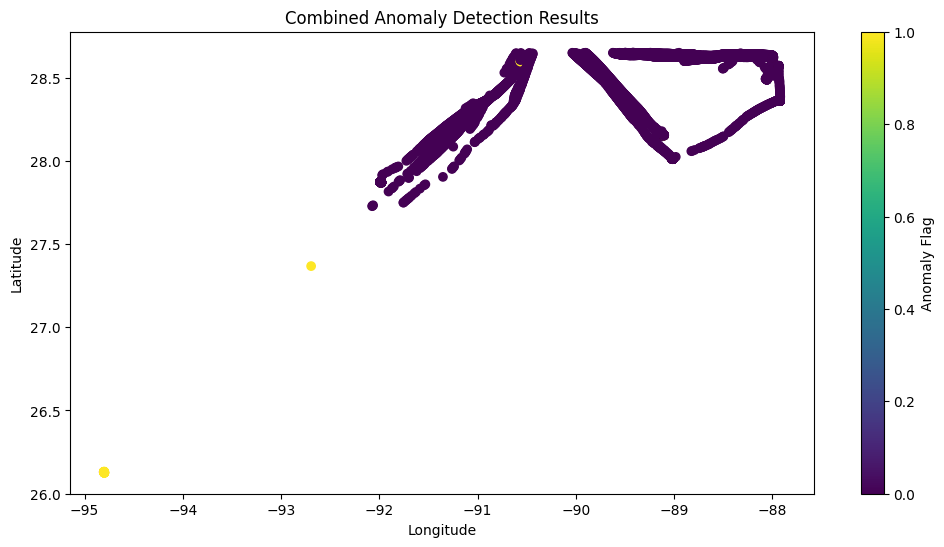

In [6]:
import matplotlib.pyplot as plt

# Visualize combined anomalies
plt.figure(figsize=(12, 6))
plt.scatter(vessel_data['LON'], vessel_data['LAT'], c=vessel_data['combined_anomaly_vote'], cmap='viridis')
plt.title('Combined Anomaly Detection Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Anomaly Flag')
plt.show()

In [7]:
if any(vessel_data['combined_anomaly_vote']):
    print("Anomalies detected!")
else:
    print("No anomalies detected.")

Anomalies detected!


In [9]:
import pandas as pd

# Load the combined results
vessel_data = pd.read_csv('vessel_data_combined_anomalies.csv')

# Check for anomalies based on the combined flag
if vessel_data['combined_anomaly_vote'].any():
    print("Anomalies detected!")

    # Identify the type of anomaly based on individual flags
    for index, row in vessel_data.iterrows():
        if row['combined_anomaly_vote']:
            anomaly_types = []
            if row['zscore_anomaly']:
                anomaly_types.append('Z-score anomaly')
            if row['moving_avg_anomaly']:
                anomaly_types.append('Moving average anomaly')
            if row['kalman_anomaly']:
                anomaly_types.append('Kalman filter anomaly')
            if row['dbscan_anomaly']:
                anomaly_types.append('DBSCAN anomaly')
            if row['isolation_forest_anomaly']:
                anomaly_types.append('Isolation Forest anomaly')
            if row['autoencoder_anomaly']:
                anomaly_types.append('Autoencoder anomaly')

            print(f"Vessel ID: {row['MMSI']}, Anomaly Types: {anomaly_types}")
else:
    print("No anomalies detected.")

Anomalies detected!
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615000, Anomaly Types: ['DBSCAN anomaly', 'Isolation Forest anomaly', 'Autoencoder anomaly']
Vessel ID: 368615